![](https://www.luisllamas.es/wp-content/uploads/2019/02/tensorflowkeras.png)
* 텐서플로우
    * 구글이 2011년에 개발을 시작하여 2015년에 오픈 소스로 공개한 신경망 라이브러리.
* 케라스
    * 케라스(Keras)는 파이썬으로 작성된 오픈 소스 신경망 라이브러리.
    * ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System) 프로젝트의 연구적 노력의 일환으로 개발.
    * 텐서플로우를 쉽게(!) 활용하여 모델링할 수 있는 함수 제공.(텐서플로가 안쪽에서 잘 작동할 수 있게 해주는 껍데기?단)

----

# 딥러닝 코드 구조 익히기

* 딥러닝 알고리즘은 머신러닝 알고리즘의 하나로 이해해도 무방하다
* 딥러닝 코드 구조를 익히는 연습을 합니다.(다음 절차와 코드를 외웁시다.)
    * 구조 설계
    * 컴파일 및 학습
    * 검증 및 평가
* 여기서는 성능에 초점을 두지 맙시다. 



### 라이브러리 Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 딥러닝을 위한 함수들
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

# Regression

## 1.Boston House Price

### (1) 데이터 전처리

#### 1) 데이터 준비

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [4]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

In [5]:
x.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

#### 4) 가변수화

#### 5) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

#### 1) 모델 설계

In [7]:
# 분석단위 구조(1차원)
nfeatures = x_train.shape[1] #num of columns
nfeatures

13

In [30]:
# 1차원은 이렇게 표기하기로 약속
(nfeatures,)

(13,)

In [32]:
# 메모리 정리 : 처음부터 다시 모델링 시작.
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer = Dense(1, input_shape = (nfeatures,))     # 13개의 feature를 받아서 1개의 레이어를 통해 하나의 output을 출력하겠다는 뜻. 

# 모델에 추가
model.add(layer)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 2) 컴파일

In [9]:
# 오차를 최소화하는 모델을 만들기 위해 optimize 하는 과정
model.compile(optimizer='adam', loss='mse')

#### 3) 학습

In [10]:
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 602.6475 - val_loss: 571.8749
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 599.8258 - val_loss: 569.1072
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 597.0234 - val_loss: 566.3345
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 594.2087 - val_loss: 563.5935
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 591.4377 - val_loss: 560.8591
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 588.6851 - val_loss: 558.1127
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 585.9222 - val_loss: 555.4183
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 583.1970 - val_loss: 552.7535
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 580.5038 - val_loss: 550.0895
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss

In [33]:
history

{'loss': [602.6474609375,
  599.8258056640625,
  597.0234375,
  594.2086791992188,
  591.4376831054688,
  588.68505859375,
  585.9222412109375,
  583.1969604492188,
  580.5038452148438,
  577.7922973632812,
  575.1012573242188,
  572.394775390625,
  569.742919921875,
  567.0413818359375,
  564.3893432617188,
  561.7615356445312,
  559.1127319335938,
  556.5408325195312,
  553.9530029296875,
  551.3998413085938,
  548.8231201171875,
  546.1917114257812,
  543.5178833007812,
  540.8900146484375,
  538.35791015625,
  535.8378295898438,
  533.3550415039062,
  530.8875122070312,
  528.4439086914062,
  525.9790649414062,
  523.562255859375,
  521.1163330078125,
  518.7105102539062,
  516.3131713867188,
  513.9425048828125,
  511.5657043457031,
  509.2117919921875,
  506.8272399902344,
  504.4950256347656,
  502.1131896972656,
  499.8424072265625,
  497.5239562988281,
  495.2113342285156,
  492.9009704589844,
  490.62847900390625,
  488.3717041015625,
  486.1222839355469,
  483.9136962890625,

#### 4) 학습그래프

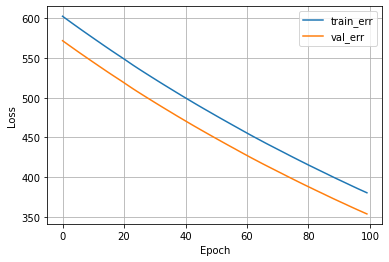

In [11]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



In [12]:
pred = model.predict(x_val)

print(f'MSE  : {mean_squared_error(y_val, pred)}')
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')   #MSE에 root를 씌우라는 구문입니다.
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
MSE  : 271.367544992895
RMSE : 16.473237234766426
MAE  : 13.807651573068954


## 2.(실습) Car Seat Sales

### (1) 데이터 전처리

#### 1) 데이터 준비

In [13]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


In [14]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

In [15]:
x.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### 4) 가변수화

In [16]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

#### 5) 데이터분할

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [18]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

In [19]:
# 함수들 불러오기


#### 1) 모델 설계

In [20]:
# 분석단위 구조


In [21]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


#### 2) 컴파일

#### 3) 학습

#### 4) 학습그래프

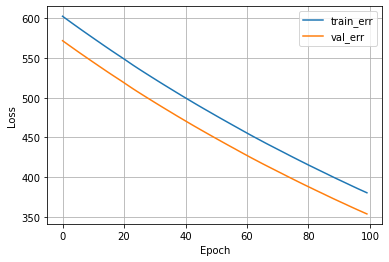

In [22]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



In [34]:
pred = model.predict(x_val)

print(f'MSE  : {mean_squared_error(y_val, pred)}')
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

ValueError: in user code:

    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 13), found shape=(None, 18)


## 3.(실습) Advertising

### (1) 데이터 전처리

#### 1) 데이터 준비

In [38]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/advertising.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

#### 4) 가변수화

#### 5) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

In [37]:
# 함수들 불러오기
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

#### 1) 모델 설계

In [40]:
# 분석단위 구조
nfeatures = x_train.shape[1]
nfeatures

18

In [41]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer = Dense(1, input_shape=(nfeatures, ))

# 모델에 추가
model.add(layer)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 19        
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


#### 2) 컴파일

In [42]:
model.compile(optimizer='adam',loss='mse')

#### 3) 학습

In [43]:
# 학습되는 역사를 history라는 변수에 딕셔너리 형태로 저장. 
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 58.9805 - val_loss: 66.9734
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 58.2099 - val_loss: 66.1649
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 57.4532 - val_loss: 65.3607
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 56.7093 - val_loss: 64.5624
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 55.9535 - val_loss: 63.7822
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 55.2193 - val_loss: 63.0083
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 54.5058 - val_loss: 62.2357
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 53.7734 - val_loss: 61.4823
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 53.0695 - val_loss: 60.7324
Epoch 10/100
8/8 [==============================] - 0s 11ms/step - loss: 52.3768 - val_loss: 59.9841
Epo

#### 4) 학습그래프

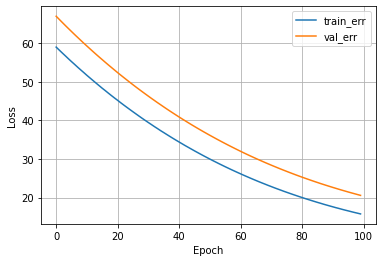

In [44]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



In [48]:
pred = model.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MSE  : {r2_score(y_val, pred)}')

3/3 [==============================] - 0s 3ms/step
RMSE : 3.850668705409208
MAE  : 2.9275339088439942
MSE  : -0.800436645205977


# Classification

## 4.타이타닉 생존자 예측

### (1) 데이터 전처리

#### 1) 데이터 준비

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

In [ ]:
target = 'Survived'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

In [ ]:
x.isna().sum()

#### 4) 가변수화

가변수화를 수행하시오.

In [ ]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

#### 5) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

In [ ]:
# 함수들 불러오기
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

#### 1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer = Dense(1, input_shape = (nfeatures,), activation= 'sigmoid')

# 모델에 추가
model.add(layer)

# 모델요약
model.summary()

#### 2) 컴파일

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

#### 3) 학습

In [ ]:
history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

#### 4) 학습그래프

In [ ]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



In [ ]:
pred = model.predict(x_val)
pred = np.where(pred>=.5,1,0)

In [ ]:
print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

## 5.(실습) 이동통신고객 이탈 예측

### (1) 데이터 전처리

#### 1) 데이터 준비

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE':1})
data.head()

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**CHURN**	|	이탈여부	|	범주	| 0,1	|
|	feature	|	INCOME	|	소득수준(달러)	|	숫자	|		|
|	feature	|	OVERAGE	|	월평균 초과사용시간(분)	|	숫자	| |
|	feature	|	LEFTOVER	|	월평균 잔여시간(%)	|	숫자	| 	|
|	feature	|	HOUSE	|	집가격(달러)	|	숫자	|	|
|	feature	|	HANDSET_PRICE	|	휴대폰가격(달러)	|	숫자	|		|
|	feature	|	OVER_15MINS_CALLS_PER_MONTH	|	월평균 장기통화 횟수	|	숫자	| 		|
|	feature	|	AVERAGE_CALL_DURATION	|	평균통화시간(분)	|	숫자	|		|

In [ ]:
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

In [ ]:
x.isna().sum()

#### 4) 가변수화

#### 5) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

In [ ]:
# 함수들 불러오기




#### 1) 모델 설계

In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


#### 2) 컴파일

#### 3) 학습

#### 4) 학습그래프

In [ ]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



## 6.(실습) 대학원 지원

### (1) 데이터 전처리

#### 1) 데이터 준비

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Graduate_apply.csv"
data = pd.read_csv(path)
data.head()

In [ ]:
target = 'admit'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) 변수정리

#### 3) NA 조치

#### 4) 가변수화

#### 5) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

#### 6) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

In [ ]:
# 함수들 불러오기




#### 1) 모델 설계

In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


#### 2) 컴파일

#### 3) 학습

#### 4) 학습그래프

In [ ]:
plt.plot(history['loss'], label='train_err')
plt.plot(history['val_loss'], label='val_err')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

#### 5) 검증 및 평가
만든 모델은 얼마나 정확한지 검증해 봅시다.

